# Word Cloud generator
With this notebook you can generate some wordclouds rappresenting the most common words in the tweets.

Said tweets are taken from a csv and then they are cleaned from twitter specific stuff (links, emojies and so on)

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re


### Loading the data

In [12]:
csvPath = './Data/tweetsGB.csv' #input Path
header_list = ["Id", "Date", "Lang", "Text"] #csv headers
tweets = pd.read_csv(csvPath, names=header_list)
tweets.head()

,Id,Date,Lang,Text
0,1227743585933647872,2020-02-12 23:57:35+00:00,en,"b""That's a hell of a jump 1360, +245 deaths to..."
1,1227491492291178497,2020-02-12 07:15:52+00:00,en,"b'The #NewName of #CoronaVirus2019\n\nToday, #..."
2,1230265713899769856,2020-02-19 22:59:38+00:00,en,b'A look at the most recent descriptive study ...
3,1230198584081092610,2020-02-19 18:32:53+00:00,en,b'Diagnostic capacity isn\xe2\x80\x99t just cr...
4,1231594945779240960,2020-02-23 15:01:31+00:00,en,b'Wall going up at #HolidayInn at #Heathrow ai...


### Selecting the wanted time period

In [13]:
print(f'Total number of tweets: {len(tweets)}')

start_date = '2020-04-15'
end_date = '2021-04-20'
mask = (tweets['Date'] >= start_date) & (tweets['Date'] <= end_date)
tweets = tweets.loc[mask]

print('# of tweets left: {}'.format(tweets.shape[0]))


Total number of tweets: 27232
# of tweets left: 17671


### Cleaning the text from Social media stuff

In [14]:
def CleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove tags
    text = re.sub(r'RT[\s]+', '', text) #remove ReTweets
    text = re.sub(r'https?:\/\/\S+', '', text) #remove links
    text = re.sub(r'\\\S+', '', text) #Remove emojies and sp chars
    text = re.sub(r'#', '', text) #Remove emojies and sp chars
    text = re.sub(r'b\'', '', text) #remove the "b'"
    return text

In [15]:
tweets['ParsedText'] = tweets['Text'].apply(CleanText)
tweets.head()

,Id,Date,Lang,Text,ParsedText
2969,1250564652548972544,2020-04-15 23:20:22+00:00,en,b'Isolation day 30: \nI\xe2\x80\x99m always as...,Isolation day 30: always astonished at how ma...
2970,1250547491252117504,2020-04-15 22:12:10+00:00,en,b'Today is another day in my new lockdown rout...,Today is another day in my new lockdown routin...
2971,1250543361917886464,2020-04-15 21:55:46+00:00,en,b'#WFH #covid Garden Camp #lifestyle #lifestyl...,WFH covid Garden Camp lifestyle lifestylephoto...
2972,1250540917087494144,2020-04-15 21:46:03+00:00,en,b'@realColinMac https://t.co/HqleI8ZyKZ\n\n\xf...,"COVID LIGHTNING BOLT from God, are the Marti..."
2973,1250539307414302722,2020-04-15 21:39:39+00:00,en,b'#spiceislandinn #stillandwest #portsmouth #f...,spiceislandinn stillandwest portsmouth fisheye...


### Removing stopwords to avoid trivial results

In [16]:
import pandas as pd
import nltk.corpus
nltk.download('stopwords') #download most common stopwords
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ginef\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
#Custon stopword to avoid trivial results
custom_stopwords = ['b', 'covid', 'stayhome', 'pandemic', 'coronavirus', 'corona', 'covid19', 'mask', 'vaccine', 'amp', 'covid_19', 'masks']
stop_words = stopwords.words('english') + custom_stopwords

Word = re.compile(r'\w+')

def Check(x):
    words = Word.findall(x)
    outPut = ''
    for word in words:
        if not word.lower() in stop_words:
            outPut += ' ' + word
    return outPut

tweets['CleanedText'] = tweets['ParsedText'].apply(lambda x : Check(x))

tweets.head()

,Id,Date,Lang,Text,ParsedText,CleanedText
2969,1250564652548972544,2020-04-15 23:20:22+00:00,en,b'Isolation day 30: \nI\xe2\x80\x99m always as...,Isolation day 30: always astonished at how ma...,Isolation day 30 always astonished many peopl...
2970,1250547491252117504,2020-04-15 22:12:10+00:00,en,b'Today is another day in my new lockdown rout...,Today is another day in my new lockdown routin...,Today another day new lockdown routine Yoga H...
2971,1250543361917886464,2020-04-15 21:55:46+00:00,en,b'#WFH #covid Garden Camp #lifestyle #lifestyl...,WFH covid Garden Camp lifestyle lifestylephoto...,WFH Garden Camp lifestyle lifestylephotograph...
2972,1250540917087494144,2020-04-15 21:46:03+00:00,en,b'@realColinMac https://t.co/HqleI8ZyKZ\n\n\xf...,"COVID LIGHTNING BOLT from God, are the Marti...",LIGHTNING BOLT God Martians coming brimstone ...
2973,1250539307414302722,2020-04-15 21:39:39+00:00,en,b'#spiceislandinn #stillandwest #portsmouth #f...,spiceislandinn stillandwest portsmouth fisheye...,spiceislandinn stillandwest portsmouth fishey...


### Generating the word clouds

In [18]:
def GetWordCloud(df):
    AllWords = ''.join([word for word in df])
    return WordCloud(width=1920,
                        height = 1080,
                        random_state=21,
                        background_color='white',
                        collocations=False).generate(AllWords)

VanillaWC = GetWordCloud(tweets['Text'])
ParsedWC = GetWordCloud(tweets['ParsedText'])
CleanedWC = GetWordCloud(tweets['CleanedText'])

### Visualizing the word clouds

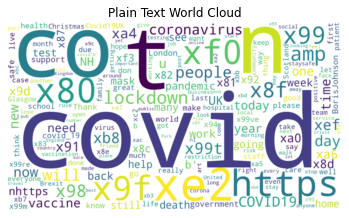

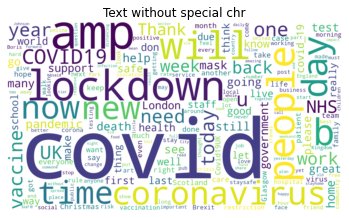

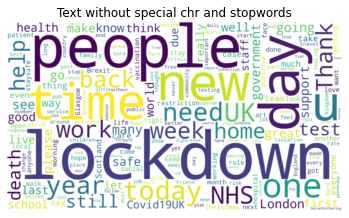

In [19]:
plt.imshow(VanillaWC, interpolation= 'bilinear')
plt.title('Plain Text World Cloud')
plt.axis('off')
plt.show()

plt.imshow(ParsedWC, interpolation= 'bilinear')
plt.title('Text without special chr')
plt.axis('off')
plt.show()

plt.imshow(CleanedWC, interpolation= 'bilinear')
plt.title('Text without special chr and stopwords')
plt.axis('off')
plt.show()

### Saving the word clouds

In [20]:
CleanedWC.to_file('wordCloud'+ start_date + '_' + end_date +'.png')